In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math as math
from scipy.optimize import minimize
import scipy.stats as ss
from scipy.signal import find_peaks 
from matplotlib import rc
from scipy.optimize import fsolve

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 24

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#en figur der fylder en kolonne har bredde 5,8, f.eks: fig, ax= plt.subplots(figsize=(5.8,4))
#en figur der fylder to kolonner har dobbeltbredde??

In [9]:
data = np.transpose(np.loadtxt("AlphaCMs.txt",skiprows = 1))
GV = np.delete(data[0],13)
alphaEn = np.delete(data[1],13)
alphaErr = np.delete(data[2],13)
alphaErr = alphaErr+5

In [10]:
#til at slå op i masses.dat
data = np.transpose(np.loadtxt("masses.txt"))

N=data[0]
Z=data[1]
A=data[2]
massExcess=data[3]
bEPrNkl=data[4]

mp = 938.272*1000
me = 0.510998*1000
mn = 939.565*1000

def me2(a, z):
    a_indices = np.where(A == a)
    z_indices = np.where(Z == z)
    a = lambda: print('Could not find mass excess for given numbers')
    for i in range(len(a_indices[0])):
        if np.any(z_indices[0] == a_indices[0][i]):
            me = bEPrNkl[a_indices[0][i]]
            a = lambda: me
    return a()

def m2(a,z): 
    return mp*z+(a-z)*mn-me2(a,z)*a

In [11]:
mp = 938272.08816
mAl = m2(27,13)
mO = m2(16,8)
mN = m2(15,7)
mC = m2(12,6)
mHe = m2(4,2)

In [12]:
def cmEcalc(gv,a):
    accE = gv*a
    mb = mp
    mt = mN
    ms = mHe
    ml = mC
    beta = np.sqrt(((accE+mb)**2-mb**2))/(accE+mb+mt)
    pz = np.sqrt((accE+mb)**2-mb**2)
    en = accE + mb + mt
    gamma = 1/np.sqrt(1-beta**2)
    pzCM = gamma*(pz - beta*en)
    enCM = gamma*(en - beta*pz)
    return (enCM**2+ms**2-ml**2)/(2*enCM)-ms

In [13]:
popt, pcov = curve_fit(cmEcalc,GV,alphaEn,p0 = 1.16, sigma = alphaErr, absolute_sigma = True)

Text(0.5, 1.0, 'Accelerator calibration with $\\alpha_0$')

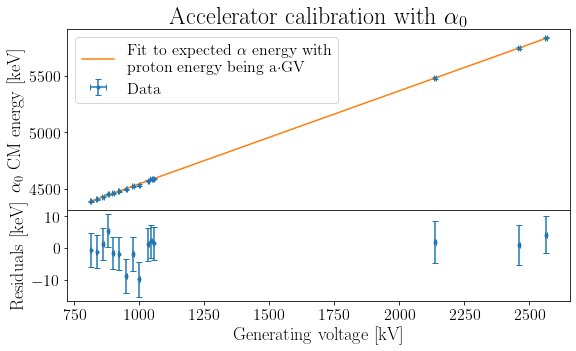

In [14]:
GVarray = np.linspace(min(GV), max(GV),1000)
fig, ax = plt.subplots(2,1,figsize = [9,5],sharex = True,gridspec_kw={'height_ratios': [2, 1]})
ax[0].errorbar(GV,alphaEn,xerr=2.5,yerr=alphaErr,fmt='.',capsize=3,label='Data')
ax[0].plot(GVarray,cmEcalc(GVarray,*popt), label = r'Fit to expected $\alpha$ energy with'+ '\n' +'proton energy being a$\cdot$GV')
ax[1].set_xlabel('Generating voltage [kV]')
plt.subplots_adjust(wspace=0, hspace=0)
ax[0].set_ylabel(r'$\alpha_0$ CM energy [keV]')
ax[0].legend()
ax[1].set_ylabel('Residuals [keV]')
ax[1].errorbar(GV,alphaEn-cmEcalc(GV,*popt),yerr=alphaErr,xerr=2.5,fmt='.',capsize=3)
ax[0].set_title(r'Accelerator calibration with $\alpha_0$')
#fig.savefig('AccCal.png',dpi=300, bbox_inches = 'tight',facecolor='white', transparent=False)

In [17]:
np.sqrt(pcov)

array([[0.00155888]])

In [21]:
len(GV)

15

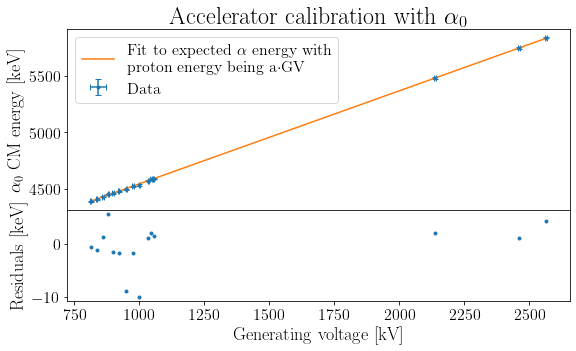

In [36]:
GVarray = np.linspace(min(GV), max(GV),1000)
fig, ax = plt.subplots(2,1,figsize = [9,5],sharex = True,gridspec_kw={'height_ratios': [2, 1]})
ax[0].errorbar(GV,alphaEn,xerr=2.5,yerr=alphaErr,fmt='.',capsize=3,label='Data')
ax[0].plot(GVarray,cmEcalc(GVarray,*popt), label = r'Fit to expected $\alpha$ energy with'+ '\n' +'proton energy being a$\cdot$GV')
ax[1].set_xlabel('Generating voltage [kV]')
plt.subplots_adjust(wspace=0, hspace=0)
ax[0].set_ylabel(r'$\alpha_0$ CM energy [keV]')
ax[0].legend()
ax[1].set_ylabel('Residuals [keV]')
ax[1].plot(GV,alphaEn-cmEcalc(GV,*popt),'.')
ax[0].set_title(r'Accelerator calibration with $\alpha_0$')
#fig.savefig('AccCal.png',dpi=300,facecolor='white', transparent=False)

In [23]:
np.sqrt(pcov)

array([[0.00155888]])

In [24]:
GVarray

array([ 813.        ,  814.75275275,  816.50550551,  818.25825826,
        820.01101101,  821.76376376,  823.51651652,  825.26926927,
        827.02202202,  828.77477477,  830.52752753,  832.28028028,
        834.03303303,  835.78578579,  837.53853854,  839.29129129,
        841.04404404,  842.7967968 ,  844.54954955,  846.3023023 ,
        848.05505506,  849.80780781,  851.56056056,  853.31331331,
        855.06606607,  856.81881882,  858.57157157,  860.32432432,
        862.07707708,  863.82982983,  865.58258258,  867.33533534,
        869.08808809,  870.84084084,  872.59359359,  874.34634635,
        876.0990991 ,  877.85185185,  879.6046046 ,  881.35735736,
        883.11011011,  884.86286286,  886.61561562,  888.36836837,
        890.12112112,  891.87387387,  893.62662663,  895.37937938,
        897.13213213,  898.88488488,  900.63763764,  902.39039039,
        904.14314314,  905.8958959 ,  907.64864865,  909.4014014 ,
        911.15415415,  912.90690691,  914.65965966,  916.41241